# 분포와 우연성


앞 절에서 우리는 범주형 자료와 연속형 자료의 분포(distribution)을 파악하는 다양한 시각적 방법에 대하여 알아 보았다.

분포는 데이터를 구성하는 관측값들이 어디에 집중되어 있고 어떻게 퍼져 있는지를 알려준다. 즉, 데이터의 분포를 이용하면 자료의 특성을 쉽게 파악할 수 있다. 평균, 중간값은 자료의 중심에 대한 정보를 알려주며 표준편차, IQR은 자료의 퍼진 정보를 알려주는 측도로서 모두 하나의 숫자로 자료의 특성을 알려준다. 

이렇게 데이터의 특성을 하나의 숫자로 요약해 주는 값을 **통계량(statistic)** 이라고 부른다.

우리가 관심있는 데이터의 특성은 중심과 퍼진 정도만 있는 것은 아니다. 데이터의 분포를 그림으로 요약하는 경우 분포의 전체적인 모양이 대칭인지? 오른쪽으로 길게 늘어진 것인지도 중요한 자료의 특성이다.

이번 시간은 분포에 대해서 좀 더 알아보자. 먼저 국민체력자료를 이용하기 위하여 데이터프레임으로 불러오자.

In [1]:
import pandas as pd
import seaborn as sns     
import numpy as np
from scipy.stats import norm # 정규분포 

import matplotlib.pyplot as plt # 그래프 그리기를 위한 라이브러리

In [2]:
url = "https://ilovedata.github.io/teaching/bigdata2/data/physical_test_2018_data.csv"
physical_data = pd.read_csv(url, sep=',', encoding = 'utf-8-sig')

## 성인 남자의 신장


앞 절에서 키와 몸무게의 분포를 알아볼 때 언급한 정규분포(Normal distribution)에 대해서 알아보자. 정규분포는 키나 몸무게와 같이 연속형 변수에 대한 분포이다. 보통 어떤 자료가 정규분포의 형태를 따른다고 하면 자료의 중심으로 대칭이며 좌우의 꼬리가 빠르게 줄어드는 형태를 말한다.

먼저 국민체력자료에서 남자들의 키에 대한 분포를 히스토그램으로 그려보자. 

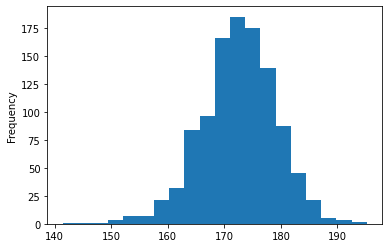

In [3]:
physical_data.loc[ physical_data["TEST_SEX"] == "M", "ITEM_F001"].plot.hist(y='ITEM_F001', bins=20)

위의 분포를 보면 좌우 대칭으로 보이지만 좌측으로 꼬리가 더 길다. 왜 그럴까? 아이들은 아직도 무럭무럭 자라고 있기 때문에 아이들의 키는 최종적인 신장이 아니다. 대한민국의 아이들이 시간에 따라서 어떻게 자라는지 나타내는 [도표(성장곡선)](https://knhanes.kdca.go.kr/knhanes/sub08/sub08_02.do)은 국민건강영양조사에서 얻어진 자료로 알 수있다. 

이제 관심의 대상을 정확하게 **성인 남자의 키** 라고 정하고 분포를 고려해 보자. 
데이터를 분석할 경우 관심의 대상이 대는 집단의 성격과 자격을 합리적이고 적절하게 정해야 한다.

성인(19세 이상)만 선택하여 분포를 보면 아래와 같다. 이제 분포가 거의 좌우 대칭으로 나타나며 양쪽 꼬리 부분이 빨리 줄어든다.  

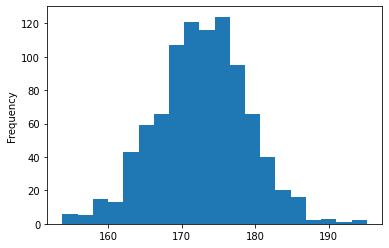

In [4]:
physical_data.loc[ (physical_data["TEST_SEX"] == "M") & (physical_data["TEST_AGE"] >= 19), "ITEM_F001"].plot.hist(y='ITEM_F001', bins=20)

이제 성인 남자의 키의 평균과 표준편차를 구해보자. 데이타의 값을 $x_1, x_2, \dots, x_n$ 이라고 하면 평균 $\bar x$ 와 표준편차 $s$ 는 다음과 같이 계산한다.

$$ \bar x = \frac{\sum_{i=1}^n x_i}{n} $$

$$ s = \sqrt{ \frac{\sum_{i=1}^n (x_i - \bar x)^2}{n-1}} $$

평균(mean)은 자료의 중심에 대한 통계량이고, 표준편차(standard deviation)은 자료가 퍼진 정도를 나타내는 통계량이다. 참고로 자료의 분산(variance; $s^2$)은 표준편차를 제곱한 값이다. 분산 또한 자료가 퍼진 정도를 나타내는 통계량이다.

[질문] 왜 분산과 표분편차는 서로 제곱한 관계인데 둘 중에 무었을 써야하나? 분산과 표분편차, 모두 자료가 퍼진 정도를 나타내는 통계량이지만 일반적으로 자료가 퍼진 정도를 기술하는 경우 표준 편차를 사용한다. 그 이유는 자료와 단위(scale)가 같기 때문이다.   

 먼저 편의상 성인 남자의 신장, 몸무게, 체질량지수(Body Mass Index; BMI)를 `physical_adult_man`에 저장하고 변수명을 각각 `height`, `weight`, `bmi`로 바꾸자.  

 

In [5]:
physical_adult_man = physical_data.loc[ (physical_data["TEST_SEX"] == "M") & (physical_data["TEST_AGE"] >= 19), ["ITEM_F001","ITEM_F002", "ITEM_F003" ]]
physical_adult_man.columns = ["height", "weight", "bmi"]

In [6]:
physical_adult_man.head(5)

,height,weight,bmi
0,159.2,57.2,30.3
2,175.2,96.2,32.8
3,178.7,79.4,17.9
7,174.9,74.5,35.7
15,175.3,71.3,17.2


이제 성인 남자의 키의 평균과 표준편차를 구해보자. 또한 앞에서 배운 다양한 통계량들고 `describe()` 메소드를 이용하여 구해보자.

In [7]:
stats_adult_man = physical_adult_man.describe().reset_index()
stats_adult_man 

,index,height,weight,bmi
0,count,920.000000,920.000000,920.000000
1,mean,172.695435,74.105870,22.215109
2,std,6.246716,11.718713,9.611098
3,min,153.800000,31.100000,4.900000
4,25%,168.700000,66.100000,17.400000
5,50%,172.750000,73.250000,21.900000
6,75%,176.800000,80.300000,26.500000
7,max,195.200000,132.300000,236.000000


## 정규분포

앞에서 언급한 정규분포에 대해서 자세하게 알아보자. 정규분포(normal distrbution)은 평균과 분산이 주어지면 분포의 모양을 다음과 같은 식으로 나타낼 수 있다. 

평균 $\mu$이고 분산이 $\sigma^2$인 정규분포를 $N(\mu,~\sigma^2)$로 표시하며 분포의 모양은 다음과 같은 식으로 나타난다.

$$ f(x; \mu,\sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left (-\frac{ (x-\mu)^2}{2\sigma^2} \right ) $$

여러분이 위의 식을 외울 필요는 없으니 걱정하지 말자....

앞에서 체력측정자료에서 구한 성인 남자의 신장에 대한 평균이 $172.7$cm 이고 표준편차는 $s = 6.2$ 이다. 이렇게 구한 평균과 분산을 이용하여 위에서 제시된 정규분포의 확률분포를 그려보자.  

먼저 성인 남자의 신장에 대한 평균과 표준편차를 각각 `mean_h` 와 `sd_h` 에 저장하자.


In [8]:
# 성인 남자 키의 평균과 표준편차 
mu = stats_adult_man.loc[1,"height"]
sigma   = stats_adult_man.loc[2,"height"]

다음으로 정규분포의 그래프 $f(x; \mu, \sigma)$ 를 그리기 위하여  x 축의 값을 150cm 에서 시작하여 200cm 까지 1씩 증가하는 수열(백터)을 만든다. 3장에서 배운 `np.arrage()` 함수를 사용하자.

주어진 x 값으로 `norm.pdf(x, mu, sigma )` 함수를 이용하여 정규분포의 그래프 $f(x; \mu, \sigma)$의 값을 계산한다.

In [9]:
# 150cm 부터 200cm 까지 1cm씩 증가하는 1차원 벡터  
x  = np.arange(150, 200, 1)

# 정규분포 함수의 값 계산
fx = norm.pdf(x, mu, sigma )

이제 정규분포 $N(172.7, 6.2^2)$의 분포 그래프를 그려보자. 

`plt.plot` 은 라이브러리 `matplotlib.pyplot` 의  함수를 `plot(x,y)` 이용한다는 것이다.
두 개의 주어진 백터 `x` 와 `fx` 를 이차원 평면에 그려준다. `plt.show()` 는 말 그대로 그림을 출력하라는 의미이다.

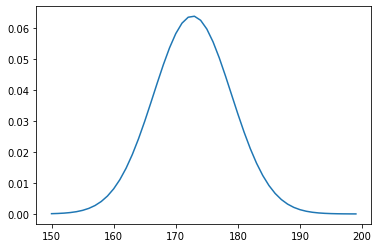

In [10]:
plt.plot(x, fx)
plt.show()

이제 성인남자의 키에 대한 히스토그램과 정규분포 $N(172.7, 6.2^2)$의 분포 그래프를 같이 그려보자.

분포의 모양이 거의 일치하는 것을 알 수 있다.

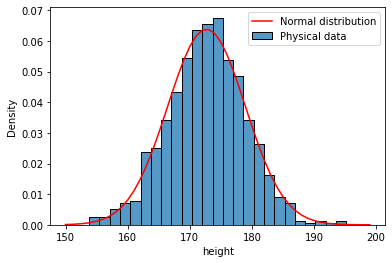

In [11]:
hist = sns.histplot(data=physical_adult_man, x="height",stat="density", label='Physical data')
hist.plot(x, fx, 'red', label='Normal distribution')                                                   
hist.legend()

## 우연성과 분포 

정규분포는 **확률 분포(probability distribution)** 라도 부른다. 

확률분포는 그 분포를 따르는 어떤 변수 값이 **임의로(randomly)** 주어지는 경우 나타날 수 있는 값들의 **가능성** 을 알려주는 역활을 한다. 앞에서 본 정규분포의 식 $f(x; \mu, \sigma)$을 **확률밀도함수(probability density function; pdf)** 라고 하며 나타날 수 있는 값들의 상대적인 가능성을 그래프의 높이로 나타내 준다.

정규분포를 따르는 변수의 값은 나타니기 전에 먼저 알 수 없다. 마치 우리가 주사위를 던질 경우 나타날 값을 에측 못하는 것과 같다. 하지만 분포(distribution)은 이렇게 **우연성(randomness)** 이 있는 값에 대하여 나타날 수 있는 값들의 가능성을 우리에게 알려준다. 

앞에서 보았듯이 정규분포 $N(172.7, 6.2^2)$ 는 가장 나타날 가능성이 높은 값이 평균 $172.7$ 이며 평균에서 멀어질 수록 가능성이 빠르게 감소한다.

어떻게 키의 분포와 정규분포는 그 형태가 매우 비슷할 수 있을까? 키의 분포가 정규분포와 유사한 이유는 무었일까? 


## 이상점

체력측정자료에서 성인 남자의 몸무게, 체질량지수(BMI) 는 정규분포와 비슷한 분포를 가질까?

위와 같이 성인 남자의 몸무게 히스토그램과 정규분포 확률밀도함수를 같이 그려보자.


In [12]:
# 성인 남자 몸무게의 평균과 표준편차 
mu = stats_adult_man.loc[1,"weight"]
sigma   = stats_adult_man.loc[2,"weight"]

# 40kg부터 120kg까지 1kg씩 증가하는 1차원 벡터  
x  = np.arange(40, 120, 1)

# 정규분포 함수의 값 계산
fx = norm.pdf(x, mu, sigma )

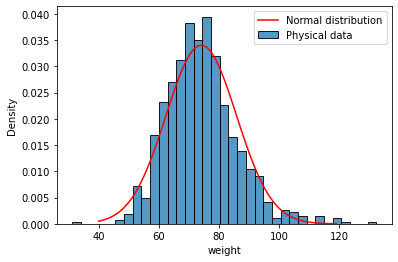

In [13]:
hist = sns.histplot(data=physical_adult_man, x="weight",stat="density", label='Physical data')
hist.plot(x, fx, 'red', label='Normal distribution')                                                   
hist.legend()

이제 성인 남자의 체질량지수 히스토그램과 정규분포 확률밀도함수를 같이 그려보자.

In [14]:
# 성인 남자 BMI의 평균과 표준편차 
mu = stats_adult_man.loc[1,"bmi"]
sigma   = stats_adult_man.loc[2,"bmi"]

# 5 부터 220 g까지 1씩 증가하는 1차원 벡터  
x  = np.arange(5, 50, 1)

# 정규분포 함수의 값 계산
fx = norm.pdf(x, mu, sigma )

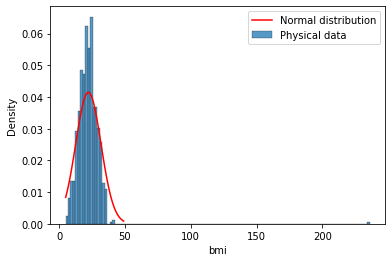

In [15]:
hist = sns.histplot(data=physical_adult_man, x="bmi",stat="density", label='Physical data')
hist.plot(x, fx, 'red', label='Normal distribution')                                                   
hist.legend()

성인 남자의 체질량지수 BMI의 최대값이 236.0 으로 나타났는데 뭔가 이상하다. 이러한 점을 **이상점(outlier)** 이라고 한다. 이상점은 잘못 입력된 값일 수 도 있고 실제로 나타난 매우 큰 값일 수도 있다. 데이터를 다루는 경우 이상점들은 언제나 나타나며 분석을 어렵게 만든다.

우리가 데이터를 분석할 때 자료를 검토하고 분포를 살펴보아야 하는 이유 중의 하나가 이상점의 존재와 그 영향을 파악하가 위함이다. 